In [1]:
%config Completer.use_jedi = False

C:\Users\gonza\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  """Entry point for launching an IPython kernel.


In [2]:
#Importacion de libreria a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
#Improtacion del csv sobre el ucal se trabajara
data = pd.read_csv("../data/properati.csv", sep = ",") 

In [4]:
#Visualizacion del tamaño y tipos de datos

In [5]:
data.shape

(121220, 26)

In [6]:
data.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [7]:
data.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

In [8]:
#Revisamos los valores nulos de cada columna y el porcentaje que estos representan para determinar que columnas seran descartadas
data_nulos_count = data.isnull().sum()
data_nulos_perc = data_nulos_count / len(data) *100
data_nulos_perc

Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.001650
title                          0.000000


In [9]:
#Transformation of the series from nulls to dataFrame
data_no_null = data.notnull().sum().to_frame("porc")
no_null_porc = data_no_null / len(data)*100

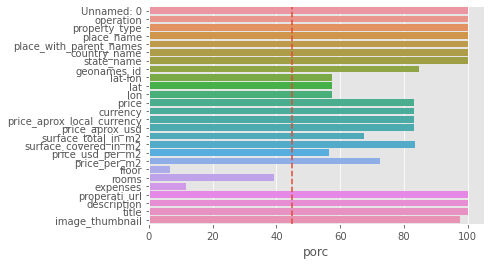

In [10]:
plt.style.use('ggplot')
g = sns.barplot(data=no_null_porc,x="porc", y=no_null_porc.index, order=no_null_porc.index)
g.axes.axvline(45,ls='--')

In [11]:
#From here the cleaning begins
#For this I generate a copy to make the changes and keep the original dataframe

In [12]:
data_clean = data.copy()

In [13]:
#We verify that there are coins and how many times each one is repeated

In [14]:
price_curr = data_clean[["currency"]].sort_values(by = "currency", ascending=False).head(15)
data_clean.currency.value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

In [15]:
#Control de datos en la columna de "place_with_parent_names"
patron = "[|]"
regex = re.compile(patron, flags = re.IGNORECASE)
place_clean = data.place_with_parent_names.apply(lambda x: regex.split(x))

In [16]:
pais = place_clean.apply(lambda x: x[1])
ciudad = place_clean.apply(lambda x: x[2])
test_place = place_clean.apply(lambda x: x[3])

In [17]:
place_val = test_place.value_counts().rename_axis('unique_values').reset_index(name='rep').sort_values(by="rep",ascending=False).head(10)
#place_val

In [18]:
#Por los valores obtenidos, la informacion util ya esta cargada en otras columnas, por esto la oclumna "place_with_parent_names" sera descartad

In [19]:
#Dropeo de columnas
data_clean.drop(columns=["lat-lon", "lat", "lon","country_name", "price","geonames_id",
                         "currency",'floor','expenses','place_with_parent_names', "price_aprox_local_currency"], inplace=True)

In [20]:
data_clean["price_aprox_usd"].sort_values(ascending=False).head(15)

24548     46545445.00
91468     25000000.00
107390    22980378.29
91479     19500000.00
91289     16000000.00
49083     15500000.00
91428     14700000.00
91229     14000000.00
34638     14000000.00
84400     13000000.00
114131    12000000.00
45689     11111111.00
525       11000000.00
55319      9900000.00
67690      9000000.00
Name: price_aprox_usd, dtype: float64

In [21]:
#En las 2 mascaras definidas a continuacion se filtraran las filas que tienen en simultaneo nulls en "surface_total_in_m2" y "price_aprox_usd"
mask_m2 = data_clean.surface_total_in_m2.isnull()
mask_price_usd = data_clean.price_aprox_usd.isnull()
mask_m2_priceusd = data_clean[mask_m2][mask_price_usd].index
mask_m2_priceusd

C:\Users\gonza\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Int64Index([   125,    126,    133,    134,    136,    156,    171,    175,
               176,    180,
            ...
            120969, 120971, 120987, 121060, 121063, 121086, 121142, 121207,
            121208, 121210],
           dtype='int64', length=7384)

In [22]:
data.drop(mask_m2_priceusd, inplace=True)

In [23]:
### Histograma para filtrar tipo de datos (Solo para vizualizar, no se borraron) y ver la significancia sobre lo valores sobre m2 y valor total de las propiedades

In [24]:
price_usd = data.price_aprox_usd

In [25]:
price_usd

0          62000.0
1         150000.0
2          72000.0
3          95000.0
4          64000.0
            ...   
121215    870000.0
121216    498000.0
121217    131500.0
121218     95900.0
121219    129000.0
Name: price_aprox_usd, Length: 113836, dtype: float64

In [26]:
price_usd = data.price_aprox_usd.rename_axis('ind').reset_index(name='data_val').sort_values(by="data_val",ascending=False)
price_usd

,ind,data_val
22701,24548,46545445.00
86115,91468,25000000.00
101542,107390,22980378.29
86126,91479,19500000.00
85938,91289,16000000.00
...,...,...
113749,121129,NaN
113827,121211,NaN
113828,121212,NaN
113829,121213,NaN


In [27]:
#En el grafico se ve que hay valroes que esta muy lejos de la media y distorcionan el resultado

<AxesSubplot:>

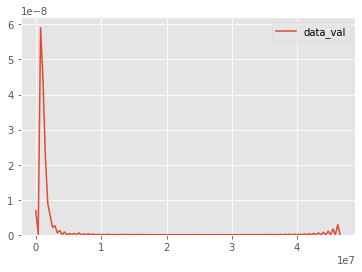

In [28]:
sns.kdeplot(data = price_usd["data_val"])

In [29]:
pd.qcut(price_usd["data_val"],10).value_counts()

(-0.001, 65000.0]         10695
(98146.43, 120000.0]      10593
(81600.0, 98146.43]       10150
(231027.3, 310000.0]      10142
(310000.0, 470000.0]      10090
(120000.0, 145000.0]      10031
(470000.0, 46545445.0]    10011
(179000.0, 231027.3]       9905
(145000.0, 179000.0]       9724
(65000.0, 81600.0]         9469
Name: data_val, dtype: int64

In [30]:
bins = [0,30000,3000000,7500000,50000000]
price_usd_interv = pd.cut(price_usd["data_val"],bins).value_counts()
price_usd_interv

(30000, 3000000]       99955
(0, 30000]               697
(3000000, 7500000]       134
(7500000, 50000000]       23
Name: data_val, dtype: int64

<AxesSubplot:>

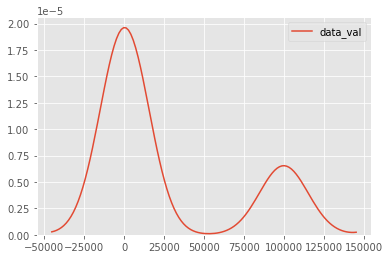

In [31]:
sns.kdeplot(price_usd_interv)

In [32]:
#filtro propiedades >30k <7.5m y valor m2 < 10k

In [33]:
price_usd_mask = data_clean.price_aprox_usd.apply(lambda x: x > 30000 and x < 7500000)

In [34]:
price_m2_mask1 = data_clean.price_usd_per_m2.apply(lambda x: x > 15000)
price_m2_mask2 = price_m2_mask1.apply(lambda x: True if x == False else False)

In [35]:
#Devuelve todos los valores por debajo de USD 15000
price_m2_fill = data_clean.price_usd_per_m2[price_m2_mask2]
price_m2_fill

0         1127.272727
1                 NaN
2         1309.090909
3                 NaN
4         1828.571429
             ...     
121215    7699.115044
121216    1383.333333
121217    2858.695652
121218    1997.916667
121219    1675.324675
Name: price_usd_per_m2, Length: 120543, dtype: float64

<AxesSubplot:>

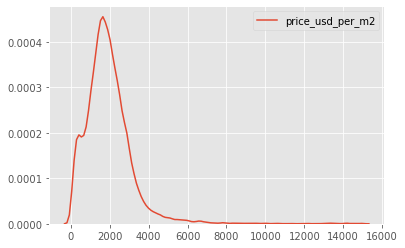

In [36]:
sns.kdeplot(data = price_m2_fill)

In [37]:
price_m2_usd = data_clean[["price_aprox_usd","price_usd_per_m2"]][price_usd_mask][price_m2_mask2]
price_m2_usd

C:\Users\gonza\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,price_aprox_usd,price_usd_per_m2
0,62000.0,1127.272727
1,150000.0,NaN
2,72000.0,1309.090909
3,95000.0,NaN
4,64000.0,1828.571429
...,...,...
121215,870000.0,7699.115044
121216,498000.0,1383.333333
121217,131500.0,2858.695652
121218,95900.0,1997.916667


<AxesSubplot:>

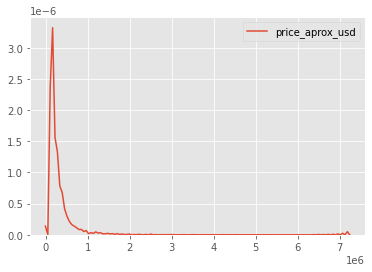

In [38]:
sns.kdeplot(data = price_m2_usd["price_aprox_usd"])

In [39]:
#Agrupamos por states y a su vez a estos los agrupamos por el typo de inmueble en venta

In [40]:
property_by_state = data_clean.groupby(["state_name", "property_type"])
property_by_state = property_by_state.size().reset_index()
property_by_state.rename(columns={"state_name":"state", "property_type":"type", 0:"total"})

,state,type,total
0,Bs.As. G.B.A. Zona Norte,PH,985
1,Bs.As. G.B.A. Zona Norte,apartment,10622
2,Bs.As. G.B.A. Zona Norte,house,13364
3,Bs.As. G.B.A. Zona Norte,store,589
4,Bs.As. G.B.A. Zona Oeste,PH,789
...,...,...,...
93,Tierra Del Fuego,store,3
94,Tucumán,PH,4
95,Tucumán,apartment,425
96,Tucumán,house,214


In [41]:
#Porcentaje de tipos de inmuebles a la venta

In [42]:
property_type = data.property_type.value_counts() / data.shape[0] *100
property_type

apartment    59.423205
house        32.321937
PH            4.885976
store         3.368882
Name: property_type, dtype: float64

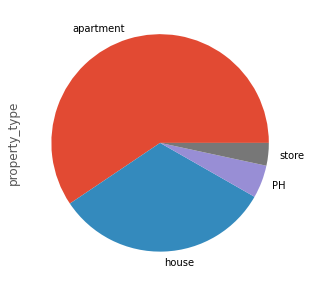

In [43]:
plot = property_type.plot.pie(figsize=(5, 5))

In [44]:
#Vamos a ver el porcentaje sobre el total que representa cada state

In [45]:
states_per = data.state_name.value_counts() / data.shape[0]*100
states_per

Capital Federal                 28.117643
Bs.As. G.B.A. Zona Norte        22.195088
Bs.As. G.B.A. Zona Sur          11.438385
Córdoba                          9.132436
Buenos Aires Costa Atlántica     8.492041
Bs.As. G.B.A. Zona Oeste         7.695281
Santa Fe                         7.287677
Buenos Aires Interior            1.893074
Neuquén                          0.492814
Tucumán                          0.479637
Mendoza                          0.467339
Corrientes                       0.439228
Río Negro                        0.420781
Misiones                         0.394427
Entre Ríos                       0.268808
San Luis                         0.210830
Chubut                           0.191504
Salta                            0.112442
La Pampa                         0.086967
Formosa                          0.057100
Chaco                            0.036017
Tierra Del Fuego                 0.027232
Catamarca                        0.023718
Santa Cruz                       0

In [46]:
#Funcion para luego agrupar los states con poo porcentaje sobre el total

In [47]:
def get_state_name(state):
    states = {"Capital Federal":"Capital Federal","Bs.As. G.B.A. Zona Norte ":"Bs.As. G.B.A. Zona Norte ",
              "Bs.As. G.B.A. Zona Sur":"Bs.As. G.B.A. Zona Sur","Córdoba":"Córdoba","Santa Fe":"Santa Fe",
              "Buenos Aires Costa Atlántica":"Buenos Aires Costa Atlántica","Bs.As. G.B.A. Zona Oeste":"Bs.As. G.B.A. Zona Oeste",
              "Buenos Aires Interior":"Buenos Aires Interior","Río Negro":"otros", "Neuquén":"otros", "Mendoza":"otros", "Tucumán":"otros",
              "Corrientes":"otros", "Misiones":"otros", "Entre Ríos":"otros", "Salta":"otros",
             "Chubut":"otros", "San Luis":"otros", "La Pampa":"otros", "Formosa":"otros",
             "Chaco":"otros", "San Juan":"otros", "Tierra Del Fuego":"otros", "Catamarca":"otros",
             "Jujuy":"otros", "Santa Cruz":"otros", "Santiago Del Estero":"otros", "La Rioja":"otros"}
    if state in states:
        result = states[state]
    else:
        result = None
    return result

In [48]:
#Abajo estoy armando el groupby para que las provincias con menos pobliacion vayan a "otros", tengo que plotearlo

In [49]:
group_states = states_per.groupby(get_state_name, axis=0)
group_states_sum = group_states.sum()

In [57]:
group_states.head()

Capital Federal                 28.117643
Bs.As. G.B.A. Zona Norte        22.195088
Bs.As. G.B.A. Zona Sur          11.438385
Córdoba                          9.132436
Buenos Aires Costa Atlántica     8.492041
Bs.As. G.B.A. Zona Oeste         7.695281
Santa Fe                         7.287677
Buenos Aires Interior            1.893074
Neuquén                          0.492814
Tucumán                          0.479637
Mendoza                          0.467339
Corrientes                       0.439228
Río Negro                        0.420781
Name: state_name, dtype: float64

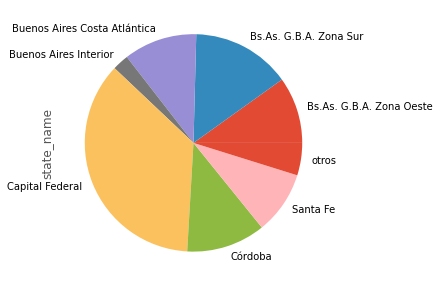

In [50]:
state_name_plot = group_states_sum
plot_state = state_name_plot.plot.pie(figsize=(5, 5))

In [51]:
#Proceso de imputacion valores faltantes m2 por locación
#Creamos un dataframe con la media de valor por state

In [52]:
group_state_price_m2 = data.groupby("state_name").agg({"price_usd_per_m2":"mean"})
group_state_price_m2.reset_index(inplace = True)
group_state_price_m2

,state_name,price_usd_per_m2
0,Bs.As. G.B.A. Zona Norte,1860.779924
1,Bs.As. G.B.A. Zona Oeste,1349.904779
2,Bs.As. G.B.A. Zona Sur,1525.356899
3,Buenos Aires Costa Atlántica,1574.633123
4,Buenos Aires Interior,959.950891
5,Capital Federal,3116.930444
6,Catamarca,556.045469
7,Chaco,939.802732
8,Chubut,1708.614091
9,Corrientes,1492.307008


In [53]:
#Tomamos solos los valores de price_usd_per_m2 que no estan completados

In [54]:
mask_price_m2_nan = data_clean.price_usd_per_m2.isnull()
data_clean.price_usd_per_m2[mask_price_m2_nan]

1        NaN
3        NaN
5        NaN
9        NaN
11       NaN
          ..
121210   NaN
121211   NaN
121212   NaN
121213   NaN
121214   NaN
Name: price_usd_per_m2, Length: 52603, dtype: float64

In [55]:
data_clean.price_usd_per_m2[mask_price_m2_nan] = data_clean.apply(lambda x: group_state_price_m2[group_state_price_m2["state_name"] == x["state_name"]].price_usd_per_m2.iloc[0], axis=1)

C:\Users\gonza\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
#Prueba de que haya cargado los datos y no queden nulls en la columna

In [78]:
data_clean.price_usd_per_m2.isnull().sum()

0

In [79]:
#El valor original de nulls en "price_aprox_usd" es de 20410
mask_usd_null = data_clean.price_aprox_usd.isnull()
data_clean[mask_usd_null].shape

(7384, 15)

In [80]:
data_clean.price_aprox_usd[mask_usd_null] = data_clean.apply(lambda x: x.price_usd_per_m2 * x.surface_total_in_m2, axis=1)

C:\Users\gonza\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
data_clean.to_csv('data_clean.csv',index = False, sep="|")

In [86]:
data_clean.shape

(121220, 15)

In [89]:
data_clean[mask_usd_null].shape

(7384, 15)